In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


### HOW TO SCALE NORMALIZE STANDARDIZE?
data pre-processing

    remove or fill missing values
    transfrom categorical / ordinal into numerical values
    deal with outliers (since they will skew the fit of the model)
    creating new features from existing ones Goal ist to achieve better ML results

scaling

regresssion with numbers in widely different scale ist an issue for variance: example 1 number in the dozens the other in the billions: creates problem as large scale number will be considerd "more important". We want all in comparable scale

option to deal with it

    (1) standardization: transform distribution to mean 0 and standard deviation of 1: For each data point subtract the mean and divide by standard deviation
    (2) normalization: from each data point substract minimum and divide by (max-min): Achievs that all values are between 0 and 1



In [2]:
#SET SIZE OF ALL PRINTS
plt.rcParams['figure.figsize'] = [25, 6]


In [3]:
credit_risk=pd.read_csv('credit_risk_dataset.csv')
credit_risk.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


#### NULL VALUES

In [4]:
credit_risk.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [5]:
credit_risk=credit_risk.dropna(how='any',axis=0)
credit_risk.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

# TARGET IS loan_status
* We want to predict if someone will default (1) or not (0)
* We are dealing with a binary classification problem


In [6]:
credit_risk['loan_status']=np.where(credit_risk['loan_status']==1,'DENY','APPROVE')

In [7]:
credit_risk['loan_status'].isnull().sum()

0

In [8]:
"""#removed target column
credit_risk.drop('loan_status',axis=1,inplace=True)
"""

"#removed target column\ncredit_risk.drop('loan_status',axis=1,inplace=True)\n"

# INVESTIGATING

In [9]:
credit_risk.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                    object
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

### Investigating the numerical variables

In [10]:
credit_risk.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


In [11]:
# TO BE NOTES
# AGE 144 LOOKS SUSPICOUS

### Multicollinearity

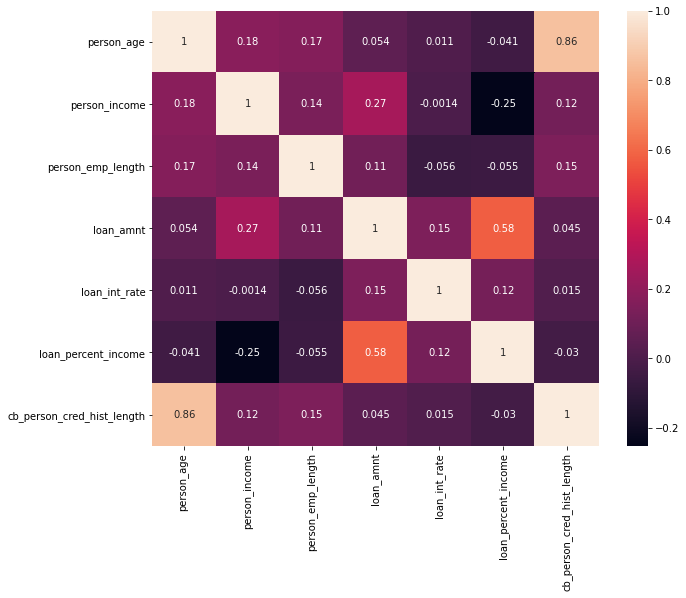

In [12]:
# Checking for multicollinearity
plt.figure(figsize=(10, 8))
ax = sns.heatmap(credit_risk.corr(), annot=True)
plt.show()

In [13]:
# Correlation with cb_person_cred_hist_length and age is annoyingly high.
# I'll get rid of cb_person_cred_hist_length to avoid multi colinarity 
credit_risk.drop('cb_person_cred_hist_length',axis=1,inplace=True)

### DISTRIBUTION
taking care of distribution of numerical variables and feeding ne distributions into analysis datafram "df_norm"

In [14]:
df_norm=pd.DataFrame(credit_risk)
df_norm.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,DENY,0.59,Y
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,APPROVE,0.10,N
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,DENY,0.57,N
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,DENY,0.53,N
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,DENY,0.55,Y


In [15]:
sns.set_theme()
sns.set(style="ticks", context="talk")
sns.pairplot(df_norm,corner=True)

AttributeError: module 'seaborn' has no attribute 'set_theme'

In [16]:
# person_age

#age 144 looked suspicous, but there is more
print(stats.describe(df_norm.person_age))
sns.set_theme()
sns.boxplot(df_norm.person_age).set_title("PERSON AGE")

DescribeResult(nobs=28638, minmax=(20, 144), mean=27.727215587680703, variance=39.821664565805136, skewness=2.5647289679115506, kurtosis=18.71526930783637)


AttributeError: module 'seaborn' has no attribute 'set_theme'

In [ ]:
# person_income
print(stats.describe(df_norm.person_income))
sns.set_theme()
sns.boxplot(df_norm.person_income).set_title("PERSON INCOME")

In [ ]:
# loan_amnt
sns.boxplot(df_norm.loan_amnt).set_title("LOAN AMOUNT")
print(stats.describe(df_norm.loan_amnt))
sns.set_theme()
plt.show()

In [ ]:
# loan_int_rate
print(stats.describe(df_norm.loan_int_rate))
sns.set_theme()
sns.boxplot(df_norm.loan_int_rate).set_title("INTEREST RATE")
plt.show()

person_emp_length

employment lenght 

* contains values 0. boxcox need strictly positive values

DescribeResult(nobs=28638, minmax=(0.0, 123.0), mean=4.788672393323556, variance=17.26092276859986, skewness=2.752794803605464, kurtosis=47.631175404335224)


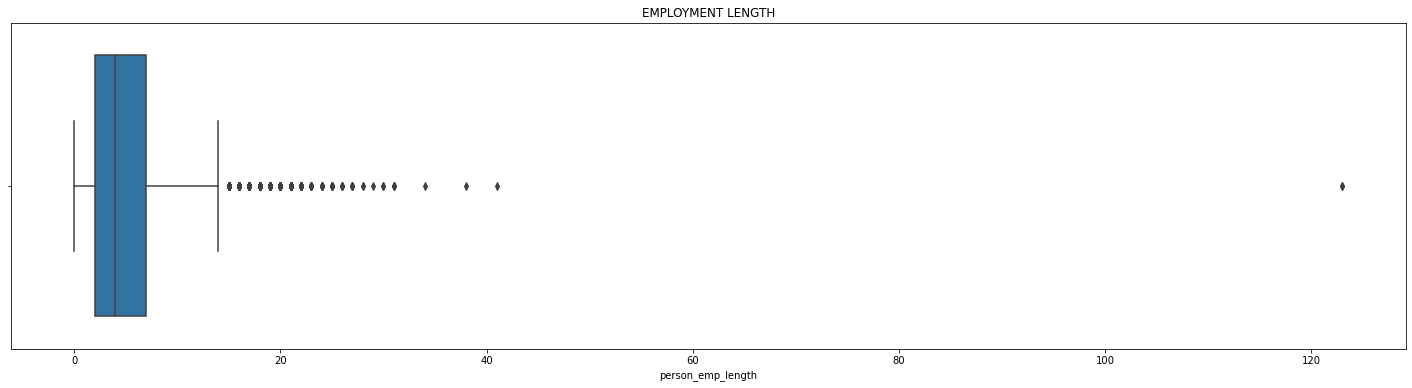

In [17]:
# EMPLOYMENT LENGTH
print(stats.describe(df_norm.person_emp_length))
sns.boxplot(df_norm.person_emp_length).set_title("EMPLOYMENT LENGTH")
plt.show()

In [18]:
# loan_percent_income
print(stats.describe(df_norm.loan_percent_income))
sns.set_theme()
sns.boxplot(df_norm.loan_percent_income).set_title("RATIO INCOME / LOAN")
plt.show()

DescribeResult(nobs=28638, minmax=(0.0, 0.83), mean=0.1694880927439067, variance=0.011319366394511495, skewness=1.0776534148284151, kurtosis=1.2911130721761417)


AttributeError: module 'seaborn' has no attribute 'set_theme'

#### BOXCOX APPLICATION
* person_age  
* person_income 
* loan_amnt 
* loan_int_rate

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html

In [19]:
#boxcox
from sklearn.preprocessing import PowerTransformer
#settting standardize to False since i will use the standardizer on the entire dataframe anyway
#setting copy to False as this will result in instant replaement of the input data 

boxcox=PowerTransformer(method='box-cox', standardize=False, copy=False)

boxcox.fit(df_norm[['person_age','person_income','loan_amnt','loan_int_rate']])
boxcox.fit_transform(df_norm[['person_age','person_income','loan_amnt','loan_int_rate']], y=None)
#creates row wise arrays!

array([[ 0.41384528,  7.23320056, 46.90579673,  6.3311228 ],
       [ 0.41381707,  6.4396164 , 17.64195333,  4.88998743],
       [ 0.41390829,  6.4396164 , 28.63100853,  5.42958587],
       ...,
       [ 0.41406517,  7.33474356, 46.90579673,  4.84140639],
       [ 0.41405766,  7.59718204, 37.53232448,  4.99898143],
       [ 0.4140658 ,  7.09353186, 29.93743604,  4.5092394 ]])

In [ ]:
df_boxcox=pd.DataFrame(boxcox.fit_transform(df_norm[['person_age','person_income','loan_amnt','loan_int_rate']], y=None)
, columns=['person_age','person_income','loan_amnt','loan_int_rate'])
df_boxcox.isnull().sum()

In [ ]:
#drop columns with original data  and replace with boxcoced data
df_norm.drop(['person_age','person_income','loan_amnt','loan_int_rate'],axis=1,inplace=True)

In [ ]:
print(df_norm.shape)
print(df_boxcox.shape)

In [ ]:
df_norm_boxcox=pd.concat([df_boxcox.reset_index(drop=True), df_norm.reset_index(drop=True)],axis=1)

In [ ]:
print(df_norm_boxcox.shape)

In [ ]:
df_norm_boxcox.shape

In [ ]:
df_norm_boxcox.isnull().sum()

In [ ]:
df_norm_boxcox

#### OUTLIERS

In [ ]:
#OUTLIERS person_income
iqr = np.percentile(df_norm_boxcox['person_income'],75) - np.percentile(df_norm_boxcox['person_income'],25)
upper_limit = np.percentile(df_norm_boxcox['person_income'],75) + 1.5*iqr 
lower_limit = np.percentile(df_norm_boxcox['person_income'],25) - 1.5*iqr

df_norm_boxcox['person_income'] = df_norm_boxcox['person_income'][(df_norm_boxcox['person_income']>lower_limit) & (df_norm_boxcox['person_income']<upper_limit)]

In [ ]:
#OUTLIES loan_percent_income
iqr = np.percentile(df_norm_boxcox.loan_percent_income,75) - np.percentile(df_norm_boxcox.loan_percent_income,25)
upper_limit = np.percentile(df_norm_boxcox.loan_percent_income,75) + 1.5*iqr 
lower_limit = np.percentile(df_norm_boxcox.loan_percent_income,25) - 1.5*iqr
df_norm_boxcox.loan_percent_income = df_norm_boxcox.loan_percent_income[(df_norm_boxcox.loan_percent_income>lower_limit) & (df_norm_boxcox.loan_percent_income<upper_limit)]


In [ ]:
#OUTLIES person_emp_length
iqr = np.percentile(df_norm_boxcox.person_emp_length,75) - np.percentile(df_norm_boxcox.person_emp_length,25)
upper_limit = np.percentile(df_norm_boxcox.person_emp_length,75) + 1.5*iqr 
lower_limit = np.percentile(df_norm_boxcox.person_emp_length,25) - 1.5*iqr
df_norm_boxcox.person_emp_length = df_norm_boxcox.person_emp_length[(df_norm_boxcox.person_emp_length>lower_limit) & (df_norm_boxcox.person_emp_length<upper_limit)]


In [ ]:
df_norm_boxcox.isnull().sum()

In [ ]:
df_norm_boxcox=df_norm_boxcox.dropna(how='any',axis=0)

## STANDARDIZE

In [ ]:
df_norm=df_norm_boxcox
df_norm.isnull().sum()

In [ ]:
from sklearn.preprocessing import StandardScaler
# selectiong only the numerical columns
df_norm_num = df_norm.select_dtypes(include = np.number)
print('Before standardization:\n ',df_norm_num .head())
# standardize data
scaler = StandardScaler(with_mean=True).fit(df_norm_num)
df_norm_num_standardized = scaler.transform(df_norm_num)
df_norm_num_standardized  = pd.DataFrame(df_norm_num_standardized, columns = df_norm_num.columns)
print('\nAfter Standardized: \n',df_norm_num_standardized .head())

#### Distribution after standardizationand scaling

In [ ]:
sns.set_theme()
sns.set(style="ticks", context="talk")
sns.pairplot(df_norm,corner=True)

## CREATE DUMMIES OF CATEGORICALS

In [ ]:
from sklearn.preprocessing import OneHotEncoder
df_norm_cat = df_norm.select_dtypes(include = np.object).drop(columns = 'loan_status')

enc = OneHotEncoder(drop = "first")

df_norm_cat = pd.DataFrame(enc.fit_transform(df_norm_cat).toarray(),columns = enc.get_feature_names())

In [ ]:
df_norm_cat=df_norm_cat.rename(columns={'x0_OTHER':'ownership_other','x0_OWN':'ownership_own','x0_RENT':'ownership_rent','x1_EDUCATION':'intent_education','x1_HOMEIMPROVEMENT':'intent_homeimprovement','x1_MEDICAL':'intent_medical','x1_PERSONAL':'intent_personal','x1_VENTURE':'intentn_venture','x2_B':'grade_B','x2_C':'grade_C','x2_D':'grade_D','x2_E':'grade_E','x2_F':'grade_F','x2_G':'grade_G','x3_Y':'prev_default'})

In [ ]:
df_norm_cat

In [ ]:
#dropped in dummy creation
#ownership: MORTGAGE
#use of loan: DEBTCONSOLIDATION
# grade: A
# default in history: No was dropped

## CONCATINATE

In [ ]:
df=pd.concat([df_norm_num_standardized,df_norm_cat],axis=1)
df

## TEST AND TRAIN

In [ ]:
X=df
y=df_norm.loan_status

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=102)

# DECISION TREE

#### Score, Precision, Recall and the F1 Score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_tree=decisiontree.predict(X_test)
print('Score: ',decisiontree.score(X_test, y_test))


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(r'Precision', precision_score(y_test, y_pred_tree, pos_label='DENY'))# we need to tell it what is our positive class. B is class indication costumer got payment trouble
print(r'Recall: ', recall_score(y_test, y_pred_tree, pos_label='DENY'))
print(r'F1 Score: ',f1_score(y_test, y_pred_tree, pos_label='DENY'))

In [ ]:
#Balanced Accuracy
from sklearn.metrics import balanced_accuracy_score
print('Balanced Accuracy; ',balanced_accuracy_score(y_test,y_pred_tree))

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print(cf_matrix_tree)
######
plt.figure(figsize=(14, 10))
sns.set_theme()
sns.heatmap(cf_matrix_tree/np.sum(cf_matrix_tree), annot=True, 
            fmt='.2%',xticklabels=[ 'Loan Approved', 'Loan Denied'],yticklabels=['Paid','Defaulted'],cmap='Blues').set_title('DECISION TREE')

In [ ]:
# 73.9% we approve them for credit, and they are able to pay it back true/negative
# 14.85% we deny them credit. and thats smart. because they are having issues true/positiv
# 6.52 we approve credit BUT they cannot pay back! This is RISK. we want this  at Zero false/negative
# 4.73 we deny credit BUT they actually could pay it back! Those are "just" good clients we refused false/positive

## Nearest neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

nearest_neighbors = KNeighborsClassifier().fit(X_train, y_train)
y_pred_nn = nearest_neighbors.predict(X_test)
print(nearest_neighbors.score(X_test, y_test))

In [ ]:
print(r'Precision', precision_score(y_test, y_pred_nn, pos_label='DENY'))# we need to tell it what is our positive class. B is class indication costumer got payment trouble
print(r'Recall: ', recall_score(y_test, y_pred_nn, pos_label='DENY'))
print(r'F1 Score: ',f1_score(y_test, y_pred_nn, pos_label='DENY'))

In [ ]:
#Balanced Accuracy
from sklearn.metrics import balanced_accuracy_score
print('Balanced Accuracy; ',balanced_accuracy_score(y_test,y_pred_nn))

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
print(cf_matrix_nn)
#####
plt.figure(figsize=(14, 10))
sns.set_theme()
sns.heatmap(cf_matrix_nn/np.sum(cf_matrix_nn), annot=True, 
            fmt='.2%', cmap='Blues',xticklabels=[ 'Loan Approved', 'Loan Denied'],yticklabels=['Paid','Defaulted']).set_title('NEAREST NEIGHBOUR')

In [ ]:
# BAD! false negative is larger tan with decisiontree. 
# We offer credit to 7,35% that actually adre defaulting

## SVM SUPPORT VECTOR MACHINE


In [ ]:
from sklearn.svm import SVC

svm = SVC().fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print(svm.score(X_test, y_test))

In [ ]:
print(r'Precision', precision_score(y_test, y_pred_svm, pos_label='DENY'))# we need to tell it what is our positive class. B is class indication costumer got payment trouble
print(r'Recall: ', recall_score(y_test, y_pred_svm, pos_label='DENY'))
print(r'F1 Score: ',f1_score(y_test, y_pred_svm, pos_label='DENY'))

In [ ]:
#Balanced Accuracy
from sklearn.metrics import balanced_accuracy_score
print('Balanced Accuracy; ',balanced_accuracy_score(y_test,y_pred_svm))

In [ ]:
cf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(cf_matrix_svm)
####
plt.figure(figsize=(14, 10))
sns.set_theme()
sns.heatmap(cf_matrix_svm/np.sum(cf_matrix_svm), annot=True, 
            fmt='.2%', cmap='Blues',xticklabels=[ 'Loan Approved', 'Loan Denied'],yticklabels=['Paid','Defaulted']).set_title('SUPPORT VECTOR MACHINE')

In [ ]:
#thats worse. We hand out 7.33% a loan that they will actually default on

## Logisitc Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(max_iter = 500).fit(X_train, y_train)
y_pred_log = logistic.predict(X_test)
logistic.score(X_test, y_test)

In [ ]:
print(r'Precision', precision_score(y_test, y_pred_log, pos_label='DENY'))# we need to tell it what is our positive class. B is class indication costumer got payment trouble
print(r'Recall: ', recall_score(y_test, y_pred_log, pos_label='DENY'))
print(r'F1 Score: ',f1_score(y_test, y_pred_log, pos_label='DENY'))

In [ ]:
#Balanced Accuracy
from sklearn.metrics import balanced_accuracy_score
print('Balanced Accuracy; ',balanced_accuracy_score(y_test,y_pred_log))

In [ ]:
cf_matrix_log = confusion_matrix(y_test, y_pred_log)
print(cf_matrix_log)
#####
plt.figure(figsize=(14, 10))
sns.set_theme()
sns.heatmap(cf_matrix_log/np.sum(cf_matrix_log), annot=True, 
            fmt='.2%', cmap='Blues',xticklabels=[ 'Loan Approved', 'Loan Denied'],yticklabels=['Paid','Defaulted']).set_title('LOGISTIC REGRESSION')

In [ ]:
#WORST_ we assign loads of people a loan that actually will default

## RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier().fit(X_train, y_train)
y_pred_rf = forest.predict(X_test)
forest.score(X_test, y_test)

In [ ]:
print(r'Precision', precision_score(y_test, y_pred_rf, pos_label='DENY'))# we need to tell it what is our positive class. B is class indication costumer got payment trouble
print(r'Recall: ', recall_score(y_test, y_pred_rf, pos_label='DENY'))
print(r'F1 Score: ',f1_score(y_test, y_pred_rf, pos_label='DENY'))

In [ ]:
#Balanced Accuracy
from sklearn.metrics import balanced_accuracy_score
print('Balanced Accuracy; ',balanced_accuracy_score(y_test,y_pred_rf))

In [ ]:
cf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(cf_matrix_rf)
########
plt.figure(figsize=(14, 10))
sns.set_theme()
sns.heatmap(cf_matrix_rf/np.sum(cf_matrix_rf), annot=True, 
            fmt='.2%', cmap='Blues',xticklabels=[ 'Loan Approved', 'Loan Denied'],yticklabels=['Paid','Defaulted']).set_title('RANDOM FOREST')

DECISION TREE TURNED OUT TO BE BEST
PARTICULARLY  FALSE POSITIVE IS IMPORTANT TO US

# Hyperparameter Tuning for Decision Tree
#### DID NOT IMPROVE ANYTHING!


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
#confusion matrix needs y to be numerical

y_hype_train=np.where(y_train=='DENY',1,0)
y_hype_test=np.where(y_test=='DENY',1,0)

In [ ]:
param_grid = {"criterion": ["gini", "entropy"],
                 "splitter": ["best", "random"],
                 "max_depth": [3, 10, None],
                 "max_features":["auto", "sqrt", "log2",
                                ]
             }# max death helps avoiding overfitting by give a maximum depth

tune = GridSearchCV(DecisionTreeClassifier(),
                       param_grid=param_grid,
                       cv=5,scoring='recall')

tune.fit(X_train, y_hype_train)
tune.best_params_ 

In [ ]:
decisiontree_opt = DecisionTreeClassifier(**tune.best_params_).fit(X_train, y_hype_train)
y_pred_tree_opt = decisiontree_opt.predict(X_test)
decisiontree_opt.score(X_test, y_hype_test)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(r'Precision', precision_score(y_hype_test, y_pred_tree_opt, pos_label=1))# we need to tell it what is our positive class. B is class indication costumer got payment trouble
print(r'Recall: ', recall_score(y_hype_test, y_pred_tree_opt, pos_label=1))
print(r'F1 Score: ',f1_score(y_hype_test, y_pred_tree_opt, pos_label=1))

In [ ]:
cf_matrix_hyp = confusion_matrix(y_hype_test, y_pred_tree_opt)
print(cf_matrix_hyp)
#########
plt.figure(figsize=(14, 10))
sns.set_theme()
sns.heatmap(cf_matrix_hyp/np.sum(cf_matrix_hyp), annot=True, 
            fmt='.2%', cmap='Blues',xticklabels=[ 'Loan Approved', 'Loan Denied'],yticklabels=['Paid','Defaulted']).set_title('HYPERPARAMETER TUNING FOR DECISION TREE')

# EVALUATION: COMPARING MODELS

In [ ]:
compare=pd.DataFrame(columns=['models','score','recall','precision','true_positiv','true_negativ','false_positiv','false_negativ'])

In [ ]:
compare.models=['DecisionTree','NearestNeighbour','SupportVectorMachine','LogisticRegression','RandomForest','HyperDecisionTree']
compare.score=[decisiontree.score(X_test, y_test),
       nearest_neighbors.score(X_test, y_test),
       svm.score(X_test, y_test),
       logistic.score(X_test, y_test),
       forest.score(X_test, y_test),
       decisiontree_opt.score(X_test, y_hype_test)
      ]
compare.recall= [recall_score(y_test, y_pred_tree, pos_label='DENY'),
         recall_score(y_test, y_pred_nn, pos_label='DENY'),
         recall_score(y_test, y_pred_svm, pos_label='DENY'),
         recall_score(y_test, y_pred_log, pos_label='DENY'),
         recall_score(y_test, y_pred_rf, pos_label='DENY'),
         recall_score(y_hype_test, y_pred_tree_opt, pos_label=1)
        ]
compare.precision= [precision_score(y_test, y_pred_tree, pos_label='DENY'),
            precision_score(y_test, y_pred_nn, pos_label='DENY'),
            precision_score(y_test, y_pred_svm, pos_label='DENY'),
            precision_score(y_test, y_pred_log, pos_label='DENY'),
            precision_score(y_test, y_pred_rf, pos_label='DENY'),
            precision_score(y_hype_test, y_pred_tree_opt, pos_label=1)
           ]

compare.true_positiv=[(cf_matrix_tree/np.sum(cf_matrix_tree))[0][0],
              (cf_matrix_nn/np.sum(cf_matrix_nn))[0][0],
              (cf_matrix_svm/np.sum(cf_matrix_svm))[0][0],
              (cf_matrix_log/np.sum(cf_matrix_log))[0][0],
              (cf_matrix_rf/np.sum(cf_matrix_rf))[0][0],
              (cf_matrix_hyp/np.sum(cf_matrix_hyp))[0][0]
             ]
              
compare.true_negativ=[(cf_matrix_tree/np.sum(cf_matrix_tree))[1][1],
              (cf_matrix_nn/np.sum(cf_matrix_nn))[1][1],
              (cf_matrix_svm/np.sum(cf_matrix_svm))[1][1],
              (cf_matrix_log/np.sum(cf_matrix_log))[1][1],
              (cf_matrix_rf/np.sum(cf_matrix_rf))[1][1],
              (cf_matrix_hyp/np.sum(cf_matrix_hyp))[1][1]
             ]

compare.false_positiv=[(cf_matrix_tree/np.sum(cf_matrix_tree))[0][1],
               (cf_matrix_nn/np.sum(cf_matrix_nn))[0][1],
               (cf_matrix_svm/np.sum(cf_matrix_svm))[0][1],
               (cf_matrix_log/np.sum(cf_matrix_log))[0][1],
               (cf_matrix_rf/np.sum(cf_matrix_rf))[0][1],
               (cf_matrix_hyp/np.sum(cf_matrix_hyp))[0][1]
              ]
               
compare.false_negativ=[(cf_matrix_tree/np.sum(cf_matrix_tree))[1][0],
               (cf_matrix_nn/np.sum(cf_matrix_nn))[1][0],
               (cf_matrix_svm/np.sum(cf_matrix_svm))[1][0],
               (cf_matrix_log/np.sum(cf_matrix_log))[1][0],
               (cf_matrix_rf/np.sum(cf_matrix_rf))[1][0],
               (cf_matrix_hyp/np.sum(cf_matrix_hyp))[1][0]
              ]

In [ ]:
#compare[compare.select_dtypes(include=[np.number]).columns]
compare.sort_values(by='false_negativ').style.background_gradient(cmap='Blues')

In [ ]:
#pd.io.formats.style.Styler.bar(subset=compare.score, color='lightgreen')
compare.sort_values(by='false_negativ',ascending=True).style.bar(color='lightblue', vmin=0.0, vmax=1.0).bar(subset='false_negativ',color='steelblue', vmin=0.0, vmax=1.0)

### Cross Validation
Answers if our split into training and test set biased?
or if a different split creates a better result
splits 

In [ ]:
from sklearn.model_selection import cross_validate

cross_validate(DecisionTreeClassifier(),
               X_train,
               y_hype_train,
               cv=100,
               scoring="recall")["test_score"].mean()

# INSERT / 


In [ ]:
pd.set_option('display.max_columns', None)
#customer=pd.DataFrame(columns=X.columns)
customer_boxcox_standard=pd.DataFrame(columns=['person_age', 'person_income', 'loan_amnt', 'loan_int_rate'])
customer_standard=pd.DataFrame(columns=['person_emp_length','loan_percent_income'])
customer_cat=pd.DataFrame(columns=df_norm_cat.columns)


# INTERFACE

In [20]:
print('\n---\nEnter the clients age')
person_age = float(input())

print('\n---\nEnter the clients anual income (float)')
person_income=float(input())

print('\n---\nHow many years has the client been employed (in years)')
person_emp_length=float(input())

print('\n---\nEnter the demanded loan amount (float)')
loan_amnt=float(input())

print('\n---\nEnter the interest rate(float)')
loan_int_rate=float(input())

loan_percent_income=round(loan_amnt/person_income,2)

print('\n---\nEnter your client‘s home owner status:\n*mortgage\n*other\n*own\n*rent\ncopy paste from above')
ownership=input()#categorical

print('\n---\nIntended purpose of the loan:\n*debtconsolidation\n*education\n*homeimprovement\n*medical\n*personal\n*venture\ncopy paste from above')
intent=input()

print('\n---\nwhat‘s the client‘s existing credit rating [A-G]')
grade=input()
      
print('\n---\nHas there been a previous default [Y/N]')
prev_default=input()




---
Enter the clients age


KeyboardInterrupt: Interrupted by user

In [ ]:
#ownership category
ownership_other=np.where(ownership=='other',1,0)
ownership_own=np.where(ownership=='own',1,0)
ownership_rent=np.where(ownership=='rent',1,0)

In [ ]:
#intent category
intent_education=np.where(intent=='education',1,0)
intent_homeimprovement=np.where(intent=='homeimprovement',1,0)
intent_medical=np.where(intent=='medical',1,0)
intent_personal=np.where(intent=='personal',1,0)
intent_venture=np.where(intent=='venture',1,0)

In [ ]:
#grade category
grade_B=np.where(grade=='B',1,0)
grade_C=np.where(grade=='C',1,0)
grade_D=np.where(grade=='D',1,0)
grade_E=np.where(grade=='E',1,0)
grade_F=np.where(grade=='F',1,0)
grade_G=np.where(grade=='G',1,0)

In [ ]:
#previous default
prev_default=np.where(prev_default=='Y',1,0)

Entered data must be manuipulated just like the models test and train data

#### boxcox and standardizer
following features must go through boxcox and standardizer
* person_age  
* person_income 
* loan_amnt 
* loan_int_rate

#### standardizer only
(they had value 0 in train data but boxcox can only deal with strictly positive values)
person_emp_length
loan_percent_income

In [ ]:
#must be boxcoxed and standardized
customer_boxcox_standard.loc[len(customer_boxcox_standard)]=[person_age,
                        person_income,
                        loan_amnt,
                        loan_int_rate,
                        ]

#must only be standardized
customer_standard.loc[len(customer_standard)]=[person_emp_length, loan_percent_income,]

#remain as entered
customer_cat.loc[len(customer_cat)] =[
                        ownership_other,
                        ownership_own,
                        ownership_rent,
                        intent_education,
                        intent_homeimprovement,
                        intent_medical,
                        intent_personal,
                        intent_venture,
                        grade_B,
                        grade_C,
                        grade_D,
                        grade_E,
                        grade_F,
                        grade_G,
                        prev_default
                       ]

In [ ]:
customer_boxcox_standard

In [ ]:
#concatinating entered data on top of csv data to send it through boxcox transformer of my model
boxcoxtransfrom=pd.concat([customer_boxcox_standard.reset_index(drop=True),credit_risk[['person_age','person_income','loan_amnt','loan_int_rate']].reset_index(drop=True)])


In [ ]:
boxcoxtransfrom.describe()

In [ ]:
boxcoxtransfrom

In [ ]:
#boxcox transformer on customer_boxcox_standard
a=pd.DataFrame(boxcox.fit_transform(boxcoxtransfrom, y=None),columns =customer_boxcox_standard.columns)


In [ ]:
a

In [ ]:
a=a.head(1)
a

In [ ]:
b=customer_standard.head(1)
b

In [ ]:
# next step: standardizer transformer on customer_standard
# concatinating for standardize transformer
c=pd.concat([a.reset_index(drop=True),b.reset_index(drop=True)],axis=1)
#scaler.transform(b)
c

In [ ]:
#next step:standardizer transformer on customer_standard
d=pd.DataFrame(scaler.transform(c),columns=c.columns)
d

In [ ]:
customer_cat

In [ ]:
customer_cat.head(1)

In [ ]:
# next step concatinate 
customer_data=pd.concat([d.reset_index(drop=True),customer_cat.head(1).reset_index(drop=True)],axis=1)
customer_data

In [ ]:
#feed concatinated data to model.predict and return "approved" or 'denied'

In [ ]:
decisiontree.predict(customer_data)

In [ ]:
columns=['person_age','person_income','loan_amnt','loan_int_rate','person_emp_length','loan_percent_income']